In [1]:
## BITCOIN Data Analysis

In [3]:
# importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from itertools import product
import warnings
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
import numpy as np
from pandas import datetime as dt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.api import tsa
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
# getting the list of excel file stored locally
allfileslist = os.listdir("./Data/BitMex ETHUSD Trades-20190828T041154Z-001/BitMex ETHUSD Trades/")

In [5]:
# Concatenating all the files into a dataframe
df = pd.concat( [ pd.read_csv("./Data/BitMex ETHUSD Trades-20190828T041154Z-001/BitMex ETHUSD Trades/"+f) for f in allfileslist[:]])

In [6]:
df['date'] = pd.to_datetime(df['date'],unit='ms') # converting unix time to a readble format

In [7]:
print('The total number of enteires are : ', len(df)) # total numbers of rows in the dataset

The total number of enteires are :  16915218


In [8]:
df.head()

,id,exchange,symbol,date,price,amount,sell
0,a34c0c60-5da9-b23b-1c70-30d244df5c57,bm,ethusd,2018-08-08 05:48:57.027,374.10,227,True
1,ee523408-3628-72ef-a76b-625a3b5944b9,bm,ethusd,2018-08-08 05:48:58.691,374.10,500,True
2,b3ce5aef-6a9b-3f03-e5c5-dc4b3fa011df,bm,ethusd,2018-08-08 05:49:03.762,374.70,200,False
3,3886fc97-ee78-727d-3d03-7ee947d271eb,bm,ethusd,2018-08-08 05:49:07.508,374.05,50,True
4,35e93c91-326d-5c5e-ad0b-a9c50e128b57,bm,ethusd,2018-08-08 05:49:19.530,373.70,123,True


In [9]:
df.tail()

,id,exchange,symbol,date,price,amount,sell
93124,a8fe1819-eec7-3bea-51d4-5a5039b60b19,bm,ethusd,2018-12-31 23:59:51.440,130.90,1290,True
93125,f889b439-2b2f-5e1d-55a5-1b0c84f5a437,bm,ethusd,2018-12-31 23:59:51.440,130.90,3482,True
93126,4127a3fa-af16-afbb-78fb-29f8ba6bb042,bm,ethusd,2018-12-31 23:59:51.778,130.95,100,False
93127,67478507-36a7-e62a-7c18-94fcadbce6f0,bm,ethusd,2018-12-31 23:59:53.228,130.90,3106,False
93128,ce71c290-ba05-78d5-62c5-e05f327c4bcb,bm,ethusd,2018-12-31 23:59:57.100,130.90,2,False


In [10]:
# dropping the column : exchange, symbol, id as we have to work with the price and amount columns
df.drop(columns = ['exchange', 'symbol', 'id', 'sell'], inplace=True)

In [11]:
df_copy = df.copy()
df = df.set_index('date')

In [12]:
df.head()

,price,amount
date,,
2018-08-08 05:48:57.027,374.10,227
2018-08-08 05:48:58.691,374.10,500
2018-08-08 05:49:03.762,374.70,200
2018-08-08 05:49:07.508,374.05,50
2018-08-08 05:49:19.530,373.70,123


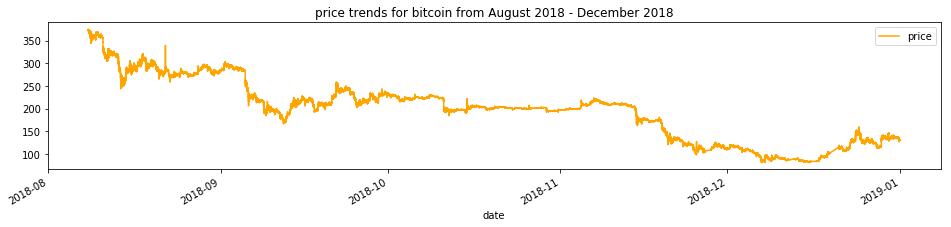

In [13]:
# Next thing plotting the data to get the general feel of our data
df.plot(y='price', color='orange', figsize=(16,3), title='price trends for bitcoin from August 2018 - December 2018')

<b> Observation :  </b>
It is clear from the plot above that the price of the Bitcoin is showing a downward                                                           trend fom Aug 2018 - Dec 2018

Text(0.5, 1.0, 'monthly average')

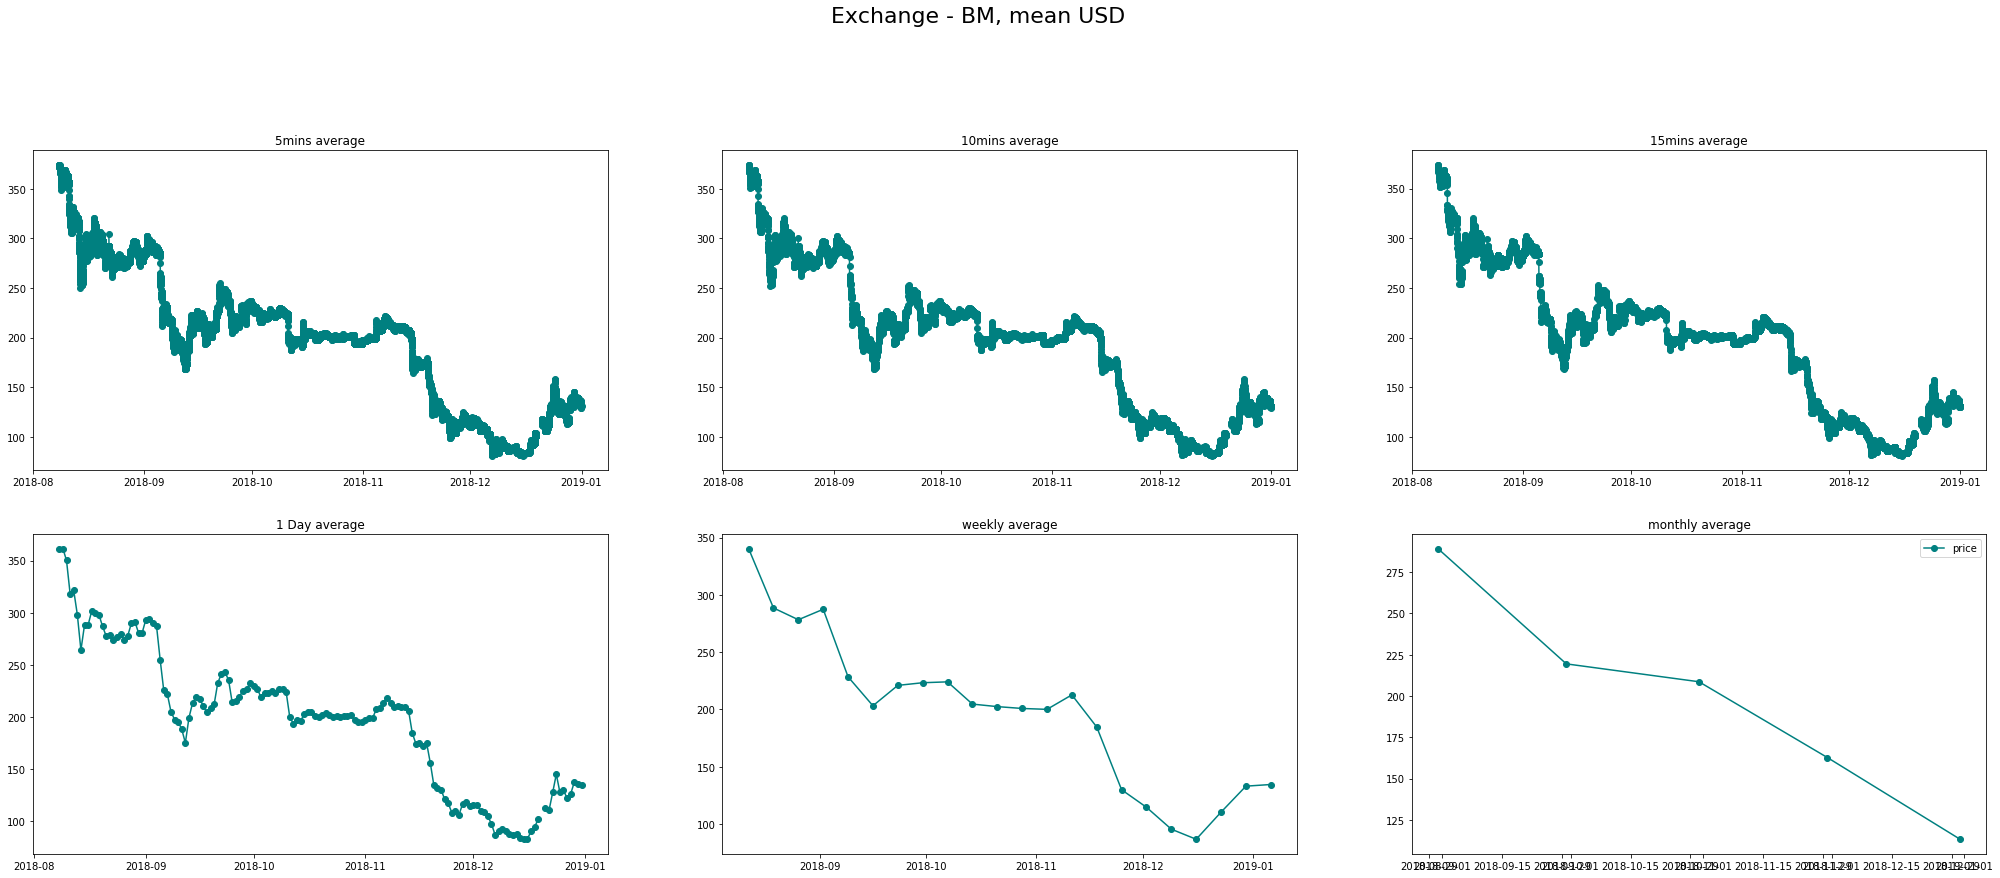

In [14]:
# VISUALIZING the data by resampling at different time intervals
# Resampling the dataset

price_5mins_avg = df.price.resample('5Min').apply(np.mean) # 5 mins time gap
price_10mins_avg = df.price.resample('10Min').apply(np.mean) # 10 mins time gap
price_15mins_avg = df.price.resample('15Min').apply(np.mean) # 15 mins time gap
price_1440mins_avg = df.price.resample('1440Min').apply(np.mean) # Daily time gap
price_weekly_avg = df.price.resample('W').apply(np.mean) # Weekly time gap
price_monthly_avg = df.price.resample('M').apply(np.mean) # Monthly time gap

plt.figure(figsize=[35, 20])
plt.suptitle('Exchange - BM, mean USD', fontsize=22)

plt.subplot(331)
plt.plot(price_5mins_avg, '-o', color='teal')
plt.title('5mins average')

plt.subplot(332)
plt.plot(price_10mins_avg, '-o', color='teal')
plt.title('10mins average')

plt.subplot(333)
plt.plot(price_15mins_avg, '-o', color='teal')
plt.title('15mins average')

plt.subplot(334)
plt.plot(price_1440mins_avg, '-o', color='teal')
plt.title('1 Day average')

plt.subplot(335)
plt.plot(price_weekly_avg, '-o', color='teal')
plt.title('weekly average')

plt.subplot(336)
plt.plot(price_monthly_avg, '-o', color='teal')
plt.legend()
plt.title('monthly average')

In [15]:
price_1440mins_avg_df = price_1440mins_avg.to_frame()
price_1440mins_avg_df = price_1440mins_avg_df.dropna()

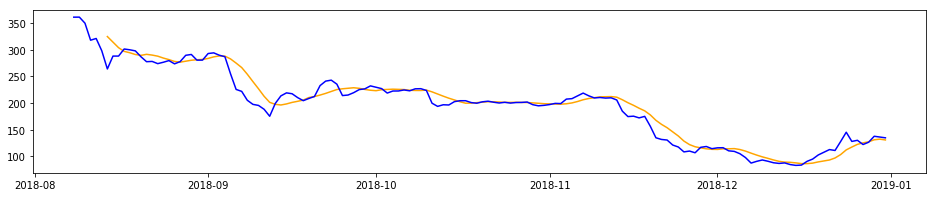

In [16]:
# Using Rolling Average 
# window of 7 (weekly avg) captures our data better in a much smoother way as shown 
# in the graph. Moving average can be used as a general method to remove
# trend and seasonal components from a time series

plt.figure(figsize=(16,3))
rolling_mean = price_1440mins_avg_df.price.rolling(window=7, center=False).mean() 
plt.plot(rolling_mean, 'orange')
plt.plot(price_1440mins_avg_df, color='blue',markersize=4)

In [17]:
# Making the data stationary

# One way of stationarising a time series is through differencing, that is taking the difference of two data points within 
# a specified period, this period is called lag

# In order to find the optimal lag we use autocorerlation method.

Dickey–Fuller test: p=0.143812


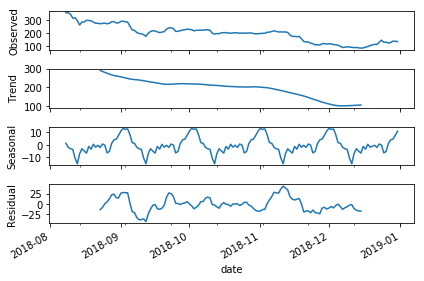

In [43]:
## Here we are using the dickey fuer test to test if the data is stationary or not

sm.tsa.seasonal_decompose(price_1440mins_avg_df.price, freq=30).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(price_1440mins_avg_df.price)[1])

In [44]:
# since the p-value > 0.05, the data is not stationary as null hypothesis is not true
# we need to convert dataset to stationary

Text(0, 0.5, 'Autocorrelation')

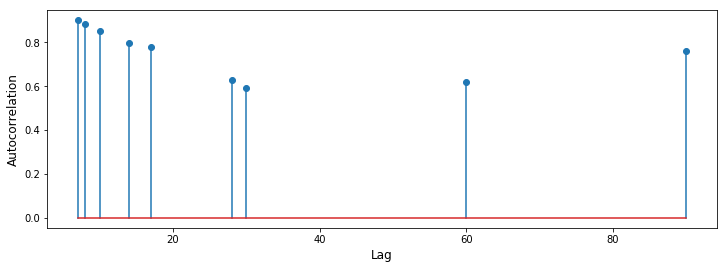

In [45]:
lags = [7, 8, 10, 14, 17, 28, 30, 60, 90] 
autocorrs = [price_1440mins_avg_df.price.autocorr(lag=lag) for lag in lags]
plt.figure(figsize=(12, 4))
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

In [46]:
## Based on the above graph the highest correlation occurs at lag of 7, that means the data repeats 
## a pattern on a weekly basis.
## Another way of checking the autocorrelation is through Pandas tools library. 
## Running that we can see positive correlation for the first 100 lags with the most 
## significant ones being the first 10 ones.

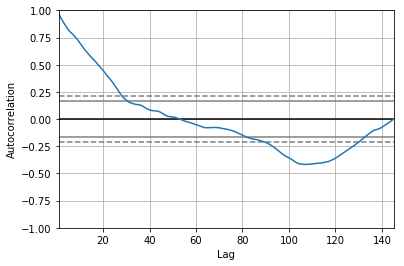

In [47]:
autocorrelation_plot(price_1440mins_avg_df)

#### We can conclude that lag of 7 is a good candidate for the optimal lag. Let's plot the original series vs the lagged version of itself with difference of 7. This means each data point (starting from the 7th one) will be deducted from the data 7 days before that and plotted on the chart (orange line below).

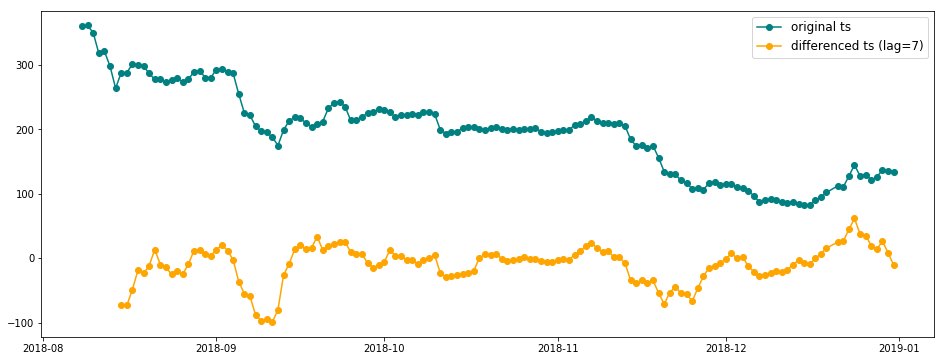

In [48]:
plt.figure(figsize=(16, 6))
plt.plot(price_1440mins_avg_df.price, '-o', color='teal', label="original ts")
plt.plot(price_1440mins_avg_df.price.diff(7), '-o', color='orange', label="differenced ts (lag=7)")
plt.legend(fontsize=12)

### Developing the models

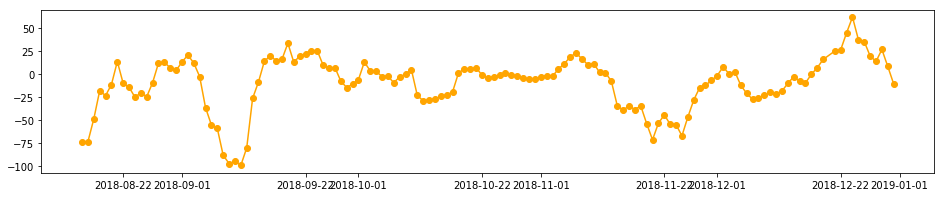

In [49]:
prices = price_1440mins_avg_df.price
price_diff = prices.diff(7).dropna() 

plt.figure(figsize=(16,3))
plt.plot(price_diff, "-o", color='orange')

In [50]:
## saving the the stationary data into a new variable and call it time_series
time_series = price_diff

###### AR Model

In [51]:
# AR stands for Auto-Regressive time series model where values are modeled as a linear combination of the p past 
# values therefore it's indicated as AR(p). 
# p defines the number of past observations that we would want the model to use to predict the next data and 
# is also known as the lag order.

Lag: 13
Coefficients: [-1.68714541  1.28797239 -0.39033647  0.10253982 -0.14895237  0.13208702
  0.1001754  -0.6073741   0.4762222  -0.16361285  0.10322002 -0.04219552
  0.02219105 -0.03322789]
predicted=59.408045, expected=37.475937
predicted=53.272404, expected=35.331913
predicted=42.663527, expected=19.616837
predicted=29.457935, expected=13.820612
predicted=22.865112, expected=26.730062
predicted=9.671052, expected=8.327494
predicted=-6.927152, expected=-10.532070
Test MSE: 229.756


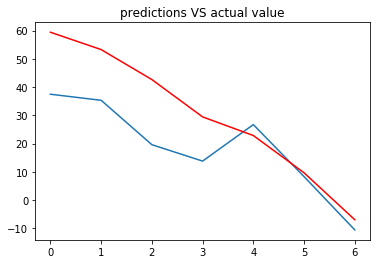

In [52]:
X = time_series.values
train, test = X[1:len(X)-7], X[len(X)-7:] ## training and testing (last 7 values have been considered as test),as the test set should be the most recent part of data

# training the autoregression model
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# makeing the predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions) # since its regression, we can use Mean Squared error as a error matrix
print('Test MSE: %.3f' % error)

# plot results
plt.plot(test)
plt.title('predictions VS actual value')
plt.plot(predictions, color='red')
plt.show()

In [ ]:
## the above graph shows the predicyion and actual values for the last 7 observations in the dataset

#### ARIMA Model

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data

In [119]:
X = price_1440mins_avg_df['price']
X = X.values

predicted=206.372327, expected=209.277522
predicted=208.150585, expected=209.763992
predicted=209.480465, expected=205.701408
predicted=202.598632, expected=184.664328
predicted=174.454071, expected=174.476961
predicted=168.240709, expected=175.227611
predicted=173.507441, expected=172.018475
predicted=172.110804, expected=174.864656
predicted=178.072064, expected=156.194152
predicted=146.633043, expected=134.589120
predicted=124.487690, expected=131.441710
predicted=129.972453, expected=130.348781
predicted=134.985248, expected=120.969569
predicted=122.335625, expected=117.243655
predicted=114.923870, expected=108.047300
predicted=100.220772, expected=109.604683
predicted=111.613704, expected=106.403218
predicted=110.247761, expected=116.655102
predicted=121.229443, expected=118.210224
predicted=115.395441, expected=114.099935
predicted=115.455039, expected=115.692457
predicted=112.850999, expected=115.921700
predicted=116.147979, expected=110.049998
predicted=114.053466, expected=109

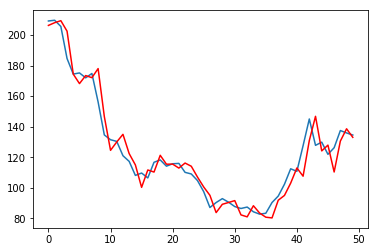

In [121]:
size = int(len(X) * 0.66) ## splitting the train and test into 66%, 34%,The test set should be the most recent part of data
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(7,1,7))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plotting the graph
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [128]:
## confidence interval for the newly forecasted value by the model depending on the values its trained

size = len(X) - 1
train, test = X[0:size], X[size:]
model = ARIMA(train, order=(7,1,7))
model_fit = model.fit(disp=False)
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
    forecast, stderr, conf = model_fit.forecast(alpha=a)
    print('%.1f%% Prediction Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, conf[0][0], conf[0][1]))

80.0% Prediction Interval: 136.138 between 124.638 and 147.638
90.0% Prediction Interval: 136.138 between 121.378 and 150.898
95.0% Prediction Interval: 136.138 between 118.550 and 153.726
99.0% Prediction Interval: 136.138 between 113.023 and 159.253


### Trading stratergies

###### Dual Moving Average Crossover
- The concept of a dual moving average crossover is fairly straightforward. Calculate two moving averages of the price, one average would be the short term and the other long term. The long term moving average will have a lower variance and will move in the same direction as the short term moving average but at a different rate. The different rates of direction, induces points where the values of the two moving averages may equal and or cross one another. These points are called the crossover points. In the dual moving average crossover trading strategy, these crossovers are points of decision to buy or sell the currencies.
- Not taking into account transaction fees or other cost which might have occured.

In [18]:
short_window = 10
mid_window = 50

signals = pd.DataFrame(index=price_1440mins_avg.index)
signals['signal'] = 0.0

roll_d10 = price_1440mins_avg.rolling(window=short_window).mean()
roll_d50 = price_1440mins_avg.rolling(window=mid_window).mean()

signals['short_mavg'] = roll_d10
signals['mid_mavg'] = roll_d50

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['mid_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

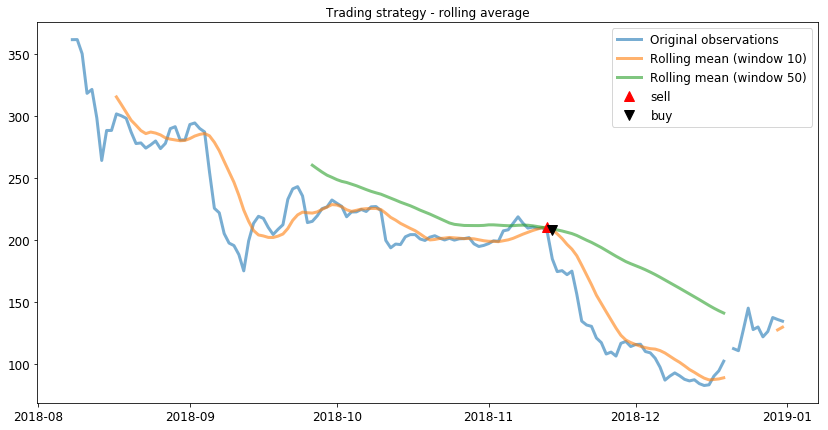

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(price_1440mins_avg.index, price_1440mins_avg, lw=3, alpha=0.6,label='Original observations')
plt.plot(price_1440mins_avg.index, roll_d10, lw=3, alpha=0.6,label='Rolling mean (window 10)')
plt.plot(price_1440mins_avg.index, roll_d50, lw=3, alpha=0.6,label='Rolling mean (window 50)')

plt.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0],'^', markersize=10, color='r', label='sell')
         
plt.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0],'v', markersize=10, color='k', label='buy')

plt.title('Trading strategy - rolling average')
plt.tick_params(labelsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.show()

<b> Exponential Moving Average :</b>
- The EMA is a weighted average of the last n (window size) prices, where the weighting decreases exponentially with each previous price/period. In simple words, recent prices are given more weight than past prices, and the degree of the contribution exponentially decay as the time period goes further to the past from the current observation.
- Not taking into account transaction fees or other cost which might have occured. 

In [21]:
exp_weighted_mean = price_1440mins_avg.resample('D').sum().ewm(span=20).mean()
signals_ema = pd.DataFrame(index=price_1440mins_avg.index)
signals_ema['signal'] = 0.0

signals_ema['original'] = price_1440mins_avg
signals_ema['EMA'] = exp_weighted_mean

signals_ema['signal'] = np.where(signals_ema['original']  > signals_ema['EMA'], 1.0, 0.0)
signals_ema['positions'] = signals_ema['signal'].diff()

<Figure size 1008x504 with 0 Axes>

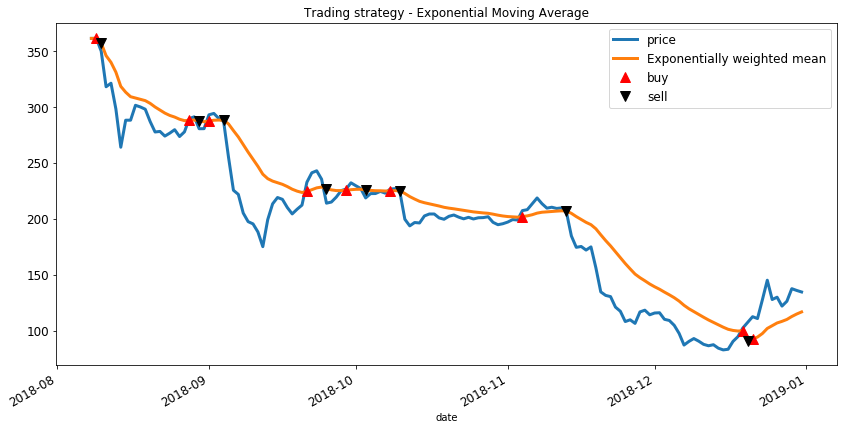

In [22]:
plt.figure(figsize=(14, 7))

ax = price_1440mins_avg_df.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='Exponentially weighted mean')

plt.plot(signals_ema.loc[signals_ema.positions == 1.0].index,signals_ema.EMA[signals_ema.positions == 1.0],'^', markersize=10, color='r', label='buy')
         
plt.plot(signals_ema.loc[signals_ema.positions == -1.0].index, signals_ema.EMA[signals_ema.positions == -1.0],'v', markersize=10, color='k', label='sell')

plt.title('Trading strategy - Exponential Moving Average')
plt.tick_params(labelsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.show()

#### Conclusion:
- The bitcoin market is volatile and changing every day as shown above.
- As a bitcoin buyer the trends were not on the buy side for the dates taken into consideration
- As a buyer, I could have started my invetsment once the trends show more toward the updward side.
